## Approximate a function by an optimal set of points

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import curve_approximation as cva

curve_approximation.py contains a collection of functions to rectify and interpolate a curve by a minimal number of points. These functions form the basis of my randon-variables repo where they are used to approximate and manipulate probability density functions.

The function is first sampled at a large number of linearly spaced points along its domain, as determined by the kwarg 'res'. The finite differences method is used to compute a numerical approximation of the 2nd derivative (d) and the absolute value of the integral of d between all neighbouring pairs of points is approximated using the trapeziodal approach. Points are trimmed from our large array of sample value such that, for all remaining points:

<br>

$$
\int_{x_i}^{x_{i+1}} \Bigg| \frac{d^2 f}{dx^2} \Bigg| \approx \epsilon
$$

<br>

Sections of curve where the 2nd derivate is small will be approximated by fewer points than areas with relatively large 2nd derivative. This is somewhat mathematically clumsy, but works quite well.

In [30]:
x = np.linspace(-1,3,500)
f = lambda x: np.sin(x**2)
y = f(x)

xarr,yarr = cva.rectify(f, a=-1, b=3, epsilon=0.9, res=0.001)

Text(0.5, 1.0, 'The approximation')

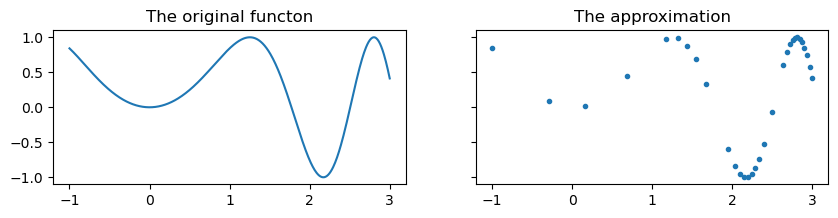

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,2), sharey=True )
ax[0].plot(x,y)
ax[0].set_title('The original functon')
ax[1].scatter(xarr,yarr,marker='.')
ax[1].set_title('The approximation')

We can use the set of points (xarr,yarr) to interpolate a smooth function g(x) to allow $(x,g(x))$ to be returned for points $x$ not in the array

Text(0.5, 1.0, 'Interpolated function based on the points')

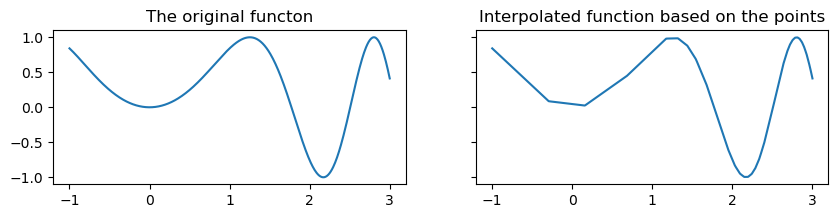

In [22]:
g = cva.interpolate(xarr,yarr)
y_hat = g(x)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,2), sharey=True )
ax[0].plot(x,y)
ax[0].set_title('The original functon')
ax[1].plot(x,y_hat)
ax[1].set_title('Interpolated function based on the points')

And we can calculate definite integrals. The integral of $\sin(x^2)$ is a Fresel integral, it cant be computed exactly however it can be shown that:

<br>

$$
\int_{0}^{x_{1}} \sin(x^2) = \sqrt{\frac{\pi}{2}}\ \ S\Bigg( \sqrt{\frac{2}{\pi}}\Bigg) \approx 0.31026920
$$

where S is the fresnel integral $S(x) = \sum^{\infty}_{n=0} (-1)^n \frac{x^{4n+3}}{(4n+3)!(2n+1)}$

<br>

Our result is correct to 2 decimal places!! Providing a smaller value of epsilon when calling cva.rectify() would result in greater accuracy


In [31]:
cva.auc(xarr,yarr,0,1)

0.31175253967937944